In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = [10, 8]
matplotlib.rc("savefig", dpi=200)

from IPython.display import display, Javascript

disable_js = """
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
"""
display(Javascript(disable_js))

<IPython.core.display.Javascript object>

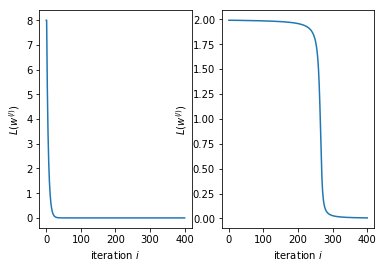

In [13]:
def alpha(z):
    return z

def dz_alpha(z):
    return 1

def L(w):
    return 1/2 * (yi - alpha(w * xi))**2

def dw_L(w):
    return -(yi - alpha(w * xi)) * dz_alpha(w * xi) * xi

def update(w):
    return w - eta * dw_L(w)

xi = 1
yi = 1
wc = -3
eta = .1

ws = [ wc ]
Ls = [ L(wc) ]
for _ in range(400):
    wn = update(wc)
    Ln = L(wc)
    ws.append(wn)
    Ls.append(Ln)
    wc = wn

ws = np.array(ws)
Ls = np.array(Ls)

plt.subplot(1, 2, 1)

plt.plot(Ls)
plt.xlabel(r'iteration $i$')
plt.ylabel(r'$L\left(w^{(i)}\right)$')


def alpha(z):
    return np.tanh(z)

def dz_alpha(z):
    return 1 / np.square( np.cosh(z) )


xi = 1
yi = 1
wc = -3
eta = .1

ws = [ wc ]
Ls = [ L(wc) ]
for _ in range(400):
    wn = update(wc)
    Ln = L(wc)
    ws.append(wn)
    Ls.append(Ln)
    wc = wn

ws = np.array(ws)
Ls = np.array(Ls)

plt.subplot(1, 2, 2)
plt.plot(Ls)
plt.xlabel(r'iteration $i$')
plt.ylabel(r'$L\left(w^{(i)}\right)$')

plt.subplots_adjust(wspace=.2)

plt.show()


In [14]:
class Sigmoid:

    def val(self, y):
        return 1.0 / ( 1.0 + np.exp(-y) )

    def diff(self, y):
        a = self.val(y)
        return a * ( 1 - a ) * np.identity(a.size)

class Tanh:

    def val(self, y):
        return np.tanh(y) 

    def diff(self, y):
        return 1 / np.square( np.cosh(y) ) 

class Relu:

    def val(self, y):
        return np.maximum(np.zeros(y.shape), y)

    def diff(self, y):
        return ( 1.0 + np.sign(y) ) / 2.0 * np.identity(y.size) 

class Linear:

    def val(self, y):
        return y

    def diff(self, y):
        return np.identity(y.size)

class Softmax:

    def val(self, y):
        dy = y - y.max()
        e = np.exp(dy)
        return e / e.sum()

    def diff(self, y):
        a = self.val(y)
        return np.diagflat(a) - np.dot(a, a.T)

class CrossEntropy:

    def val(self, xN, xBar):
        return - np.nan_to_num( np.dot(xBar.T, np.log(xN)) + np.dot((1-xBar).T, np.log(1-xN)) )
    
    def diff(self, xN, xBar):
        return np.nan_to_num( ( (xN - xBar) / (xN * (1-xN) ) ).T )

In [ ]:
alpha = Tanh()

def L(w):
    return 1/2 * (yi - alpha(w * xi))**2

def dw_L(w):
    return -(yi - alpha.val(w * xi)) * alpha.diff(w * xi) * xi

def update(w):
    return w - eta * dw_L(w)


xi = 1
yi = 1
wc = -3
eta = .1

ws = [ wc ]
Ls = [ L(wc) ]
for _ in range(400):
    wn = update(wc)
    Ln = L(wc)
    ws.append(wn)
    Ls.append(Ln)
    wc = wn

ws = np.array(ws)
Ls = np.array(Ls)

plt.subplot(1, 2, 1)

plt.plot(Ls)
plt.xlabel(r'iteration $i$')
plt.ylabel(r'$L\left(w^{(i)}\right)$')